In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

In [3]:
data = pd.read_csv('../data/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('../data/house-prices-advanced-regression-techniques/test.csv')

In [4]:
all_data = pd.concat([data,test], keys = ['data','test'])

In [5]:
all_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
data 0   1          60       RL         65.0     8450   Pave   NaN      Reg   
     1   2          20       RL         80.0     9600   Pave   NaN      Reg   
     2   3          60       RL         68.0    11250   Pave   NaN      IR1   
     3   4          70       RL         60.0     9550   Pave   NaN      IR1   
     4   5          60       RL         84.0    14260   Pave   NaN      IR1   

       LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
data 0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
     1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
     2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
     3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
     4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   

       MoSold YrSold  SaleType  SaleCondition  SalePrice  
data 0      2   2008        WD         Normal   208500.0  
     1      5   2007        WD         Normal   181500.0  
     2      9   2008        WD         Normal   223500.0  
     3      2   2006        WD        Abnorml   140000.0  
     4     12   2008        WD         Normal   250000.0  

[5 rows x 81 columns]

# Seperate categorical and numerical columns

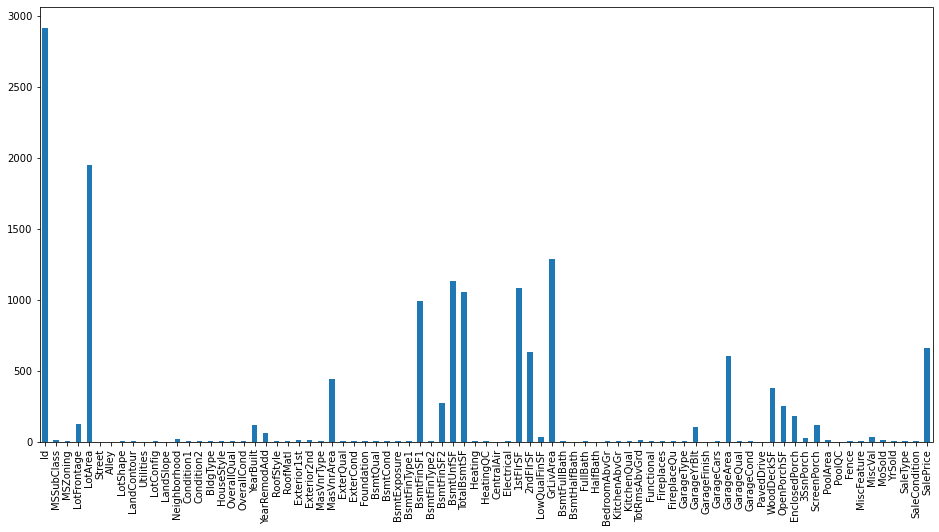

In [6]:
all_data.nunique().plot(kind = 'bar', figsize = (16, 8))

In [13]:
def feature_list(df, exclude, value_threshold):
    cat = []
    quant = []

    for i in df.columns:
        if i not in exclude:
            if df[i].dtype == 'O' or df[i].nunique() <= value_threshold:
                cat.append(i)
            else:
                quant.append(i)

    return cat, quant

In [7]:
cat, quant = feature_list(all_data, exclude = ('SalePrice','Id'), value_threshold=16)

In [9]:
print(cat)
print()
print(quant)

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']

['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'Wo

# Ensure same distribution on train and test

In [16]:
print(data.YrSold.value_counts())
print()
print(test.YrSold.value_counts())

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

2007    363
2008    318
2009    309
2006    305
2010    164
Name: YrSold, dtype: int64


In [8]:
all_data['yearmon'] = all_data['YrSold'].astype(str) + '-' + all_data['MoSold'].astype(str) + '-01'

In [9]:
all_data['yearmon'] = pd.to_datetime(all_data['yearmon'])

In [21]:
!pip install plotnine --user

  Using cached plotnine-0.7.1-py3-none-any.whl (4.4 MB)
  Using cached descartes-1.1.0-py3-none-any.whl (5.8 kB)
  Using cached mizani-0.7.1-py3-none-any.whl (62 kB)
  Using cached palettable-3.3.0-py2.py3-none-any.whl (111 kB)


In [10]:
from plotnine import *
from matplotlib import pyplot as plt

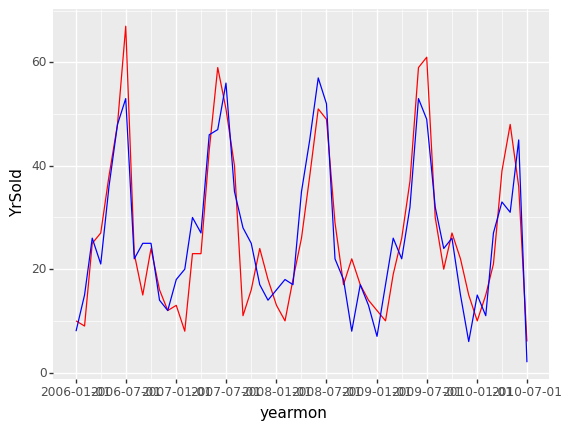

<ggplot: (130653881775)>

In [11]:
ggplot(aes(x = 'yearmon', y = 'YrSold')) + \
    geom_line(data = all_data.loc['data'].groupby('yearmon')['YrSold'].count().reset_index(), color = 'red') + \
    geom_line(data = all_data.loc['test'].groupby('yearmon')['YrSold'].count().reset_index(), color = 'b')

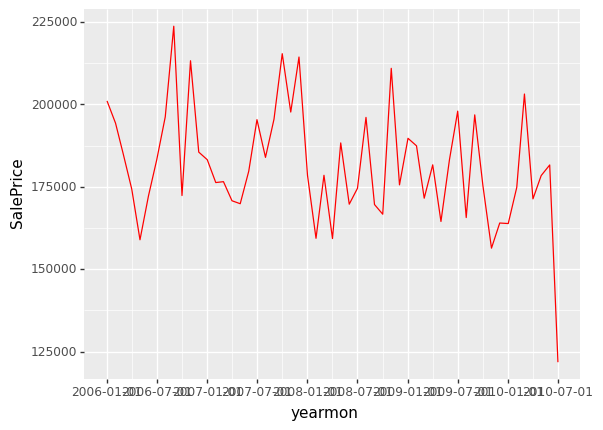

<ggplot: (130653945935)>

In [12]:
ggplot(aes(x = 'yearmon', y = 'SalePrice')) + \
    geom_line(data = all_data.groupby('yearmon')['SalePrice'].mean().reset_index(), color = 'red')